# Irisデータの分類

# 【問題1 データセットを読み込んで、どのような値が入っているか確認】

In [7]:
# データセットの確認
from sklearn.datasets import load_iris
iris = load_iris() 
#dirを使って確認。

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


##### データセットには['DESCR', 'data', 'feature_names', 'target', 'target_names']が入っているとわかる

# 【問題2 各値を参照してみる】

In [2]:
# DESCRの取得

↑データセットの解説が入ってる。

In [1]:
# dataの取得


↑謎の4つの数字が大量に出てきた。




In [5]:
# iris.data.shape

↑データの形式を調べると150行4列あるみたい。<br>
DESCRの解説をみるかぎり、150個の花のデータを意味していると推察される。

In [4]:
# feature_namesの取得

iris.dataの中身は、
[a, b, c, d]と数字があったときに、<br>
a : sepal legnth (花びら縦長) [cm]<br>
b : sepal width  (花びら幅長) [cm]<br>
c : petal length  (がくへん縦長)<br>
d : petal width   (がくへん幅長)<br>
を表しているよう。

In [6]:
# print(iris.target)

↑0 / 1 / 2 の数字の羅列が出てきた・・・

In [7]:
# iris.target.shape

↑データの数はやっぱり150。<br>
数字は 0 / 1 / 2 の3種類で、たしか3種類のアヤメのデータを分類する問題だったから、アヤメの種類を表してる？？？

In [8]:
# target_namesの確認

↑どうやら iris.targetの数字はそれぞれ<br>
0 : setosa (セトサ；ヒオウギアヤメ)<br>
1 : versicolor (ヴァーシカラー)<br>
2 : virginica (ヴァージニカ)<br>
を表しているよう。

# モデル作り

# 【問題3 まずはトレーニングデータとテストデータに分ける】

In [10]:
from sklearn.model_selection import train_test_split

# random_state=1

# 【問題4 どれくらいに分けられているか確認する】

In [11]:
# x_train.shape

In [12]:
# x_test.shape

# 【問題5 どれくらいに分けられているか確認する】

### 全部で150個あったデータが112個と、38個に分けられていたことがわかる
### y_trainとy_testも同様

In [13]:
# len(y_train)

In [19]:
# len(y_test)

38

In [15]:
# 150 * 0.25

# 【問題5 値を確認してみる】 

In [16]:
# print(y_train)

# 【問題6 ロジスティック回帰を用いてモデル作り】 

In [17]:
import warnings
warnings.filterwarnings("ignore")

# ロジスティック回帰の選択

# 学習


# 【問題7 正解率判定】

In [18]:
# pred =

### y_testとpredict_yの違い

In [19]:
# y_test # 本当の値

### 正解率を見てみましょう

In [20]:
#accuracy_scoreで正解率が見えます
from sklearn.metrics import accuracy_score
# 第一引数に本当の値、第二引数に予測値を渡す


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

In [37]:
cm

array([[13,  0,  0],
       [ 0, 10,  6],
       [ 0,  0,  9]])

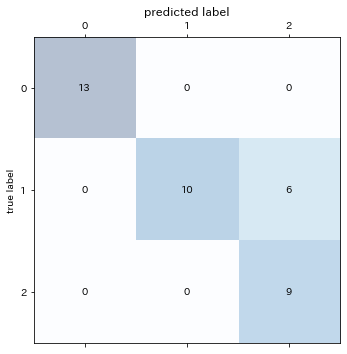

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.title('predicted label')
plt.ylabel('true label')
plt.tight_layout() # ラベルが重ならないように自動調整
plt.show()

In [43]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

iris = load_iris()
model = LogisticRegression()
#kfold = KFold(n_splits=3)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
print("cross validation score:\n{}".format(cross_val_score(model ,iris.data,iris.target,cv=kfold)))

cross validation score:
[0.94117647 0.94117647 1.        ]
